<a href="https://colab.research.google.com/github/yeon-ee/Ybigta_assignment/blob/main/EDA_FE_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA_FE 과제
#### <font color='orange'> - 약간 매운맛

by YBIGTA 16기 DA Team 김지환

<img src='https://i.imgur.com/cqdVyfs.jpg'>


---
여러분은 Airbnb 런던 지사의 데이터 분석가입니다.

이번에 호스트들에게 적정한 방 가격을 책정해주는 프로젝트를 진행할 예정입니다.

이를 위해 기존에 런던에 있던 Airbnb 방 데이터를 분석할 것입니다.

각 문제에 대해 적절한 코드 혹은 답변을 제시해보세요.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 코드. 버전에 따라 필요 없을 수도 있습니다.
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('airbnb_listings.csv', index_col=0)

<ipython-input-5-bfbc7cd960cb>:1: DtypeWarning: Columns (25,26,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_listings.csv', index_col=0)


# EDA

### 1) 전체 데이터 확인

- #### <font color='orange'> Q1. 상위 5개의 데이터를 확인해보세요. 컬럼 수가 많으니 모든 컬럼을 표시하도록 조정하세요. </font>

In [6]:
# Q1
df[:5]

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,a few days or more,22%,50%,f,0.0,0.0,['reviews'],t,f,...,NaN,f,NaN,NaN,f,f,flexible,f,f,0.01
1,2595,within a day,87%,38%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,...,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,t,t,0.38
2,3831,within an hour,83%,96%,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,...,8.0,f,NaN,NaN,f,f,moderate,f,f,4.71
3,5099,NaN,NaN,71%,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,...,9.0,f,NaN,NaN,f,f,moderate,t,t,0.59
4,5114,within a day,50%,NaN,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,0.56


---
### 2) 결측치 확인

- #### <font color='orange'> Q2. 각 컬럼의 결측치를 확인하고, 결측치가 많은 순서대로 결측치 비율과 함께 표로 나타내보세요.
<font color='orange'> (결측치 0개인 컬럼은 나타내지 마세요)

In [7]:
# Q2
column_info = df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36277 entries, 0 to 36276
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                36277 non-null  int64  
 1   host_response_time                19435 non-null  object 
 2   host_response_rate                19435 non-null  object 
 3   host_acceptance_rate              23125 non-null  object 
 4   host_is_superhost                 36271 non-null  object 
 5   host_listings_count               36271 non-null  float64
 6   host_total_listings_count         36271 non-null  float64
 7   host_verifications                36276 non-null  object 
 8   host_has_profile_pic              36271 non-null  object 
 9   host_identity_verified            36271 non-null  object 
 10  neighborhood                      36276 non-null  object 
 11  latitude                          36276 non-null  float64
 12  long

In [19]:
#Q2
from IPython.display import display
missing_data = df.isnull().sum()
missing_rate = (missing_data / len(df)) * 100
missing_info = pd.DataFrame({'결측치 수': missing_data, '결측치 비율': missing_rate})
columns_with_no_missing = missing_info[missing_info['결측치 수'] == 0].index
missing_info = missing_info.drop(labels=columns_with_no_missing, axis=0)
missing_info = missing_info.sort_values(by='결측치 비율', ascending=False)
display(missing_info)

,결측치 수,결측치 비율
jurisdiction_names,36270,99.980704
license,36267,99.972434
square_feet,35907,98.980070
monthly_price,31600,87.107534
weekly_price,30892,85.155884
host_response_time,16842,46.426110
host_response_rate,16842,46.426110
host_acceptance_rate,13152,36.254376
security_deposit,12594,34.716211
review_scores_value,6534,18.011412


- #### <font color='orange'> Q3. 결측치가 있는 컬럼과 결측치 비율을 보기쉽게 그래프로 나타내 보세요.

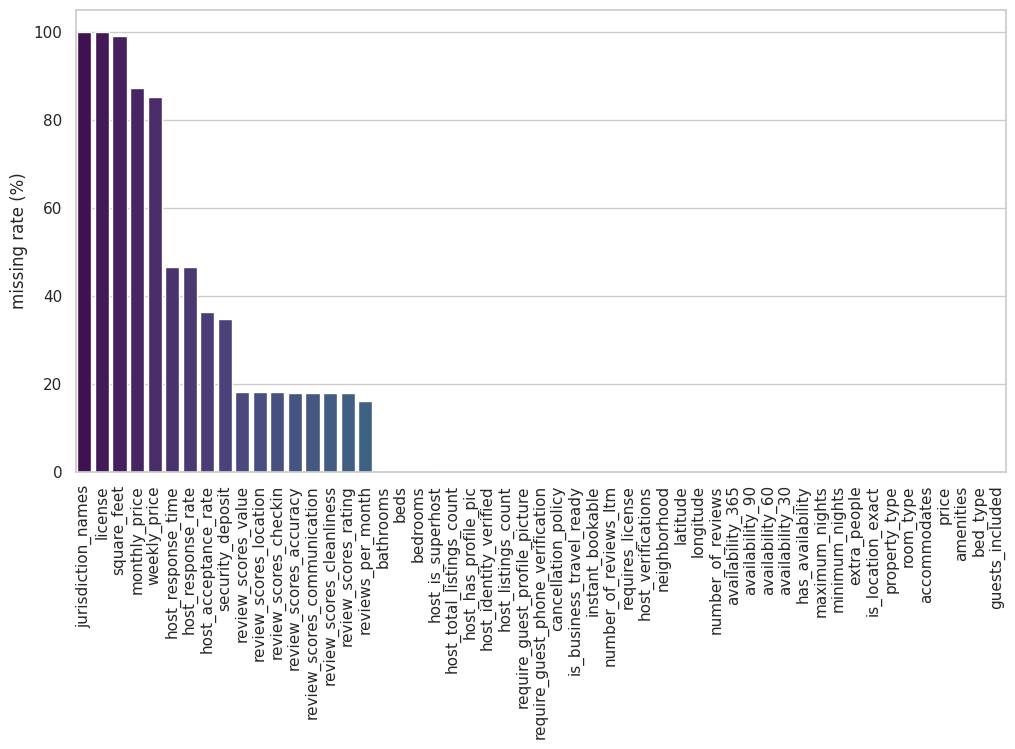

In [23]:
# Q3
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_info.index, y=missing_info['결측치 비율'], palette='viridis')
plt.ylabel('missing rate (%)')
plt.xticks(rotation=90)
plt.show()

- #### <font color='orange'> Q4. 결측치가 적은 beds 컬럼을 좀 더 자세히 살펴보겠습니다.
  #### <font color='orange'> 'beds' 컬럼이 결측치인 데이터의 상위 5개를 출력해주세요.

In [28]:
# Q4
beds_missing_rows = df[df['beds'].isnull()]

# 결과 출력
display(beds_missing_rows[:5])

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
808,321845,NaN,NaN,NaN,f,0.0,0.0,['email'],t,f,...,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,NaN
1002,468613,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,...,NaN,f,NaN,NaN,f,f,flexible,f,f,NaN
1058,499249,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,f,...,10.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,0.01
1074,505231,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'reviews']",t,f,...,10.0,f,NaN,NaN,f,f,moderate,f,f,0.01
1208,587519,NaN,NaN,0%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,...,6.0,f,NaN,NaN,f,f,flexible,f,f,0.02


---
### 3) 범주형 변수 확인
<font color='gray'> - 편의를 위해 결측치가 있는 컬럼을 모두 제거하고 진행하겠습니다.

In [29]:
drop_col = ['jurisdiction_names', 'license', 'square_feet', 'monthly_price',
       'weekly_price', 'host_response_rate', 'host_response_time',
       'security_deposit', 'host_acceptance_rate', 'review_scores_location',
       'review_scores_value', 'review_scores_checkin',
       'review_scores_accuracy', 'review_scores_communication',
       'review_scores_cleanliness', 'review_scores_rating',
       'reviews_per_month', 'beds']

In [30]:
df = df.drop(columns=drop_col)

- #### 각 컬럼별 변수 타입 확인

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36277 entries, 0 to 36276
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                36277 non-null  int64  
 1   host_is_superhost                 36271 non-null  object 
 2   host_listings_count               36271 non-null  float64
 3   host_total_listings_count         36271 non-null  float64
 4   host_verifications                36276 non-null  object 
 5   host_has_profile_pic              36271 non-null  object 
 6   host_identity_verified            36271 non-null  object 
 7   neighborhood                      36276 non-null  object 
 8   latitude                          36276 non-null  float64
 9   longitude                         36276 non-null  float64
 10  is_location_exact                 36276 non-null  object 
 11  property_type                     36276 non-null  object 
 12  room

- #### <font color='orange'> Q5. Room Type 에는 어떤 것들이 있는지 살펴보겠습니다.
#### <font color='orange'> room_type의 종류별 갯수에 대한 그래프를 그려주세요.

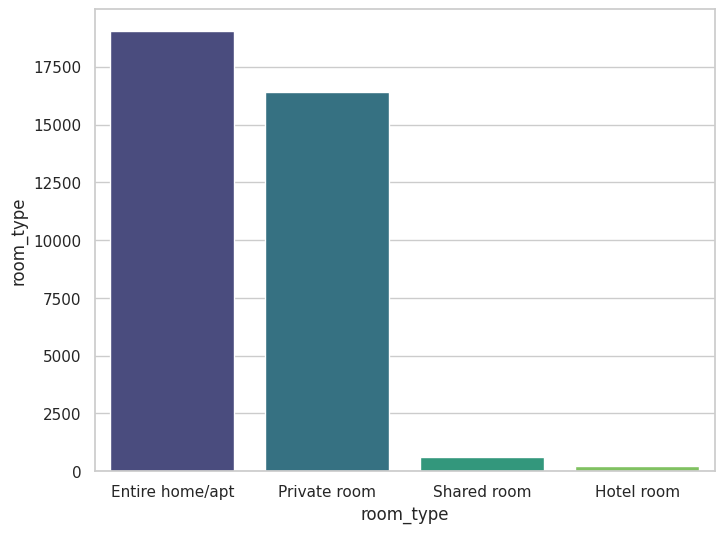

In [35]:
# Q5
room_type_counts = df['room_type'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=room_type_counts.index, y=room_type_counts, palette='viridis')
plt.xlabel('room_type')
plt.show()

- #### <font color='orange'> Q6. 위 그래프의 세로축이 갯수가 아닌 비율을 나타내도록 재구성해보세요.

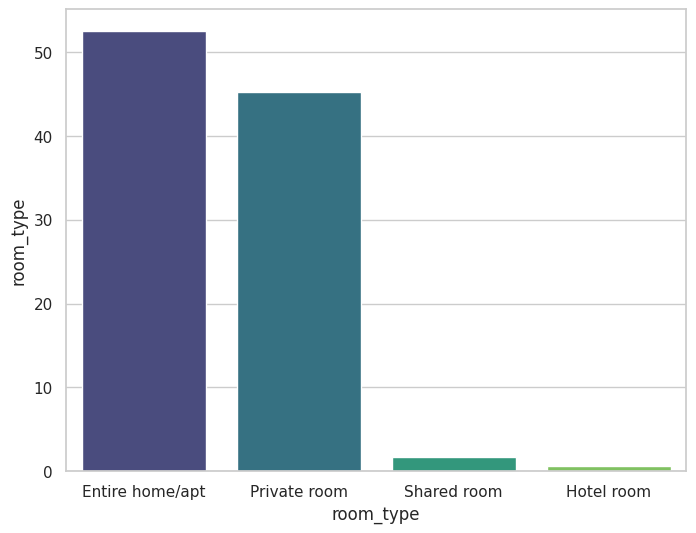

In [37]:
# Q6
room_type_rate = room_type_counts / len(df) * 100
plt.figure(figsize=(8, 6))
sns.barplot(x=room_type_counts.index, y=room_type_rate, palette='viridis')
plt.xlabel('room_type')
plt.show()

- #### <font color='orange'> Q7. 각 지역별로 room_type의 비율이 어땠는 지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 room_type의 갯수가 어땠는지 보여주세요.    

Text(0, 0.5, 'count')

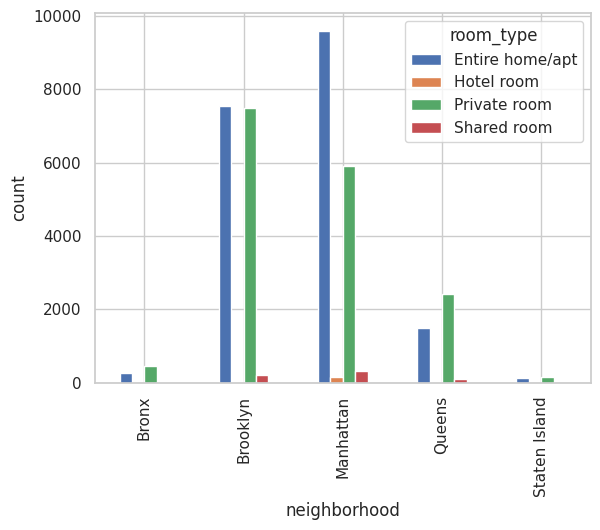

In [45]:
# 각 지역별로 room_type의 비율 계산
room_type_by_neighborhood = df.groupby(['neighborhood', 'room_type']).size().unstack(fill_value=0)
room_type_by_neighborhood.plot(kind='bar', stacked=False)
plt.ylabel('count')

- #### <font color='orange'> Q8. 각 지역별로 가격의 분포가 어떤지 알고 싶습니다.
#### <font color='orange'> 아래 그래프와 같이 각 지역별로 가격의 분포를 보여주세요.

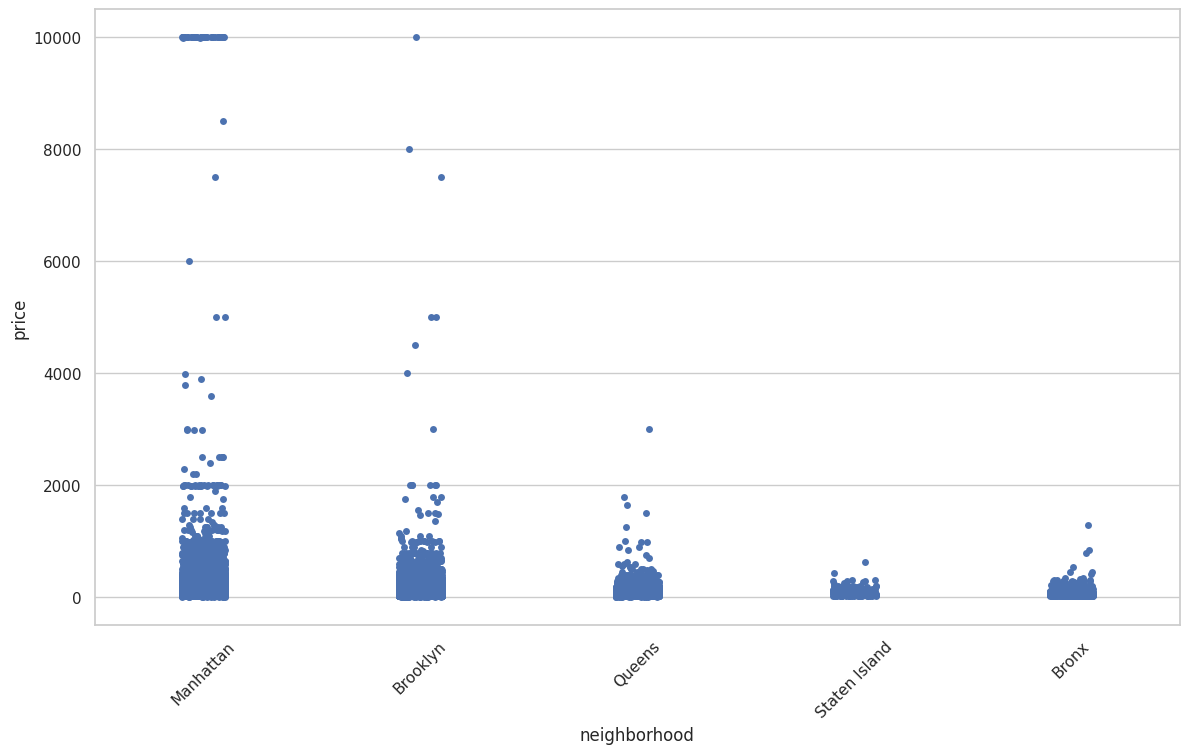

In [103]:
# Q8
# plt.figure() 여기부턴 직접 사이즈 조절해보세요
plt.figure(figsize=(14, 8))
sns.stripplot(x='neighborhood', y='price', data=df)
plt.xlabel('neighborhood')
plt.ylabel('price')
plt.xticks(rotation=45)
plt.show()

- #### <font color='orange'> Q9. 위 그래프들로부터 알 수 있는 사실은 무엇인가요? 그 이유는 무엇이라고 생각하시나요?

####맨해튼에 가격이 10000인 이상값들이 있다.
####이유는 특정 값에, 심지어 최댓값에 점들이 과도하게 모여있기 때문이다.

---
### 4) 연속형 변수 확인

- #### <font color='orange'> Q10. 각 방의 수용가능인원의 분포를 알고싶습니다.
#### <font color='orange'> 'accommodates' 칼럼에 대한 히스토그램을 그려주세요.

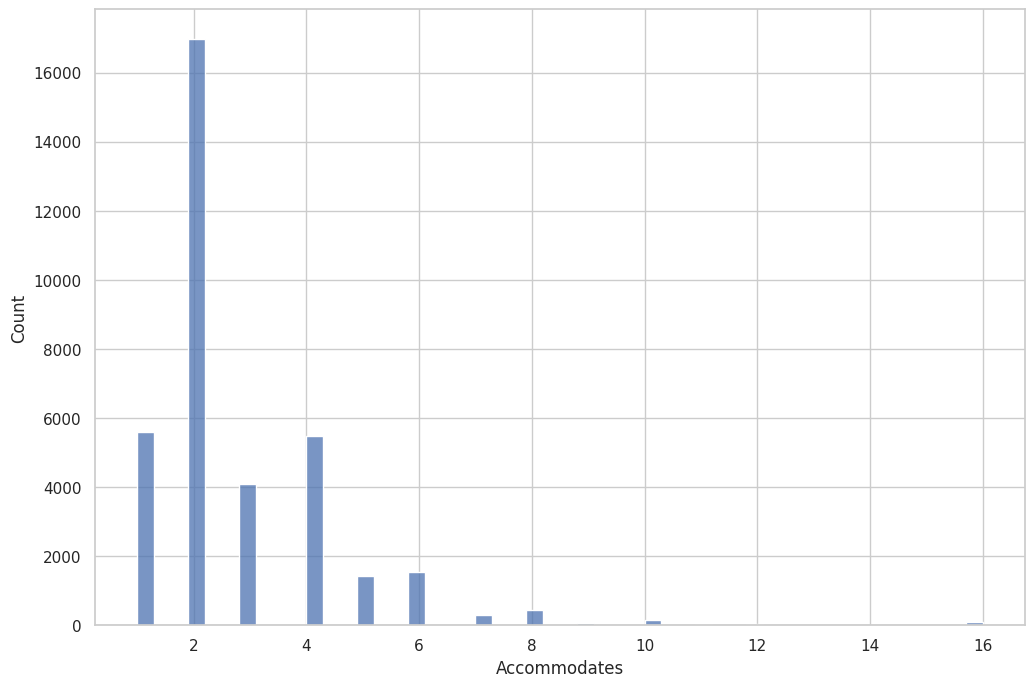

In [87]:
# Q10
plt.figure(figsize=(12, 8))
sns.histplot(df['accommodates'], bins=50)
plt.xlabel('Accommodates')
plt.ylabel('Count')
plt.show()

- #### <font color='orange'> Q11. 각 방의 가격의 분포를 알고 싶습니다.
#### <font color='orange'> 'price' 칼럼에 대한 히스토그램을 그려주세요. 범위는 0~1000까지만 보여주세요.

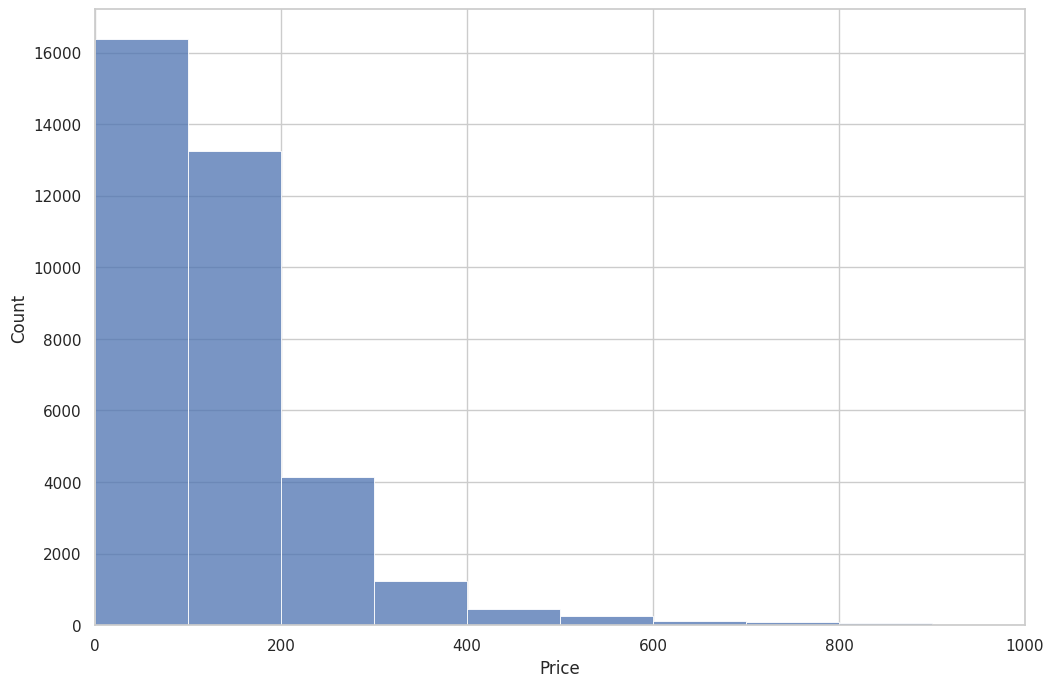

In [85]:
# Q11
plt.figure(figsize=(12, 8))
sns.histplot(df['price'], bins=100)
plt.xlim(0,1000)
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

* **굵은 텍스트** Q3 hint

<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>



---
### 5) Feature Engineering

feature에 대한 전처리를 하기 이전에 결측치가 있는 column을 모두 제거했는데, 다시 초기 상태로 되돌리고 진행하겠습니다.

In [128]:
df = pd.read_csv('airbnb_listings.csv', index_col=0)

<ipython-input-128-bfbc7cd960cb>:1: DtypeWarning: Columns (25,26,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb_listings.csv', index_col=0)


- #### <font color='orange'> Q12. 결측치에 대한 처리를 하고 싶습니다.
#### <font color='orange'> 주어진 모든 column들에 대하여 결측치가 25%이상인 경우에는 column을 drop하고 10%이상 25%미만인 경우에는 결측치가 있는 row만 drop하고, 10%미만인 경우에는 중앙값으로 대체해주세요.

In [ ]:
# Convert columns to numeric, ignoring errors (non-numeric values will become NaN)
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# 결측치 비율 계산
missing_percentage = df_numeric.isnull().mean()

# 25% 이상인 경우 해당 열을 drop
columns_to_drop = missing_percentage[missing_percentage >= 0.25].index
df_numeric = df_numeric.drop(columns=columns_to_drop)

# 10% 이상 25% 미만인 경우 결측치가 있는 행을 drop
for col in df_numeric.columns:
    missing_ratio = df_numeric[col].isnull().mean()
    if 0.10 <= missing_ratio < 0.25:
        df_numeric = df_numeric.dropna(subset=[col])

# 10% 미만인 경우 중앙값으로 대체
for col in df_numeric.columns:
    missing_ratio = df_numeric[col].isnull().mean()
    if missing_ratio < 0.10:
        df_numeric[col] = df_numeric[col].fillna(df_numeric[col].median())
df_numeric.isnull().sum()

- #### <font color='orange'> Q13. 앞서 진행한 EDA를 바탕으로 FE를 진행하고자 합니다..
#### <font color='orange'> 총 3개의 FE를 진행하시고, 해당 FE를 진행한 이유에 대해 **간단히** 작성해주세요.


In [117]:
#Q13-1) # t 대신 1, f 대신 0으로 대체
# 이유: 같은 의미를 포함하지만 공간 절약
df.replace({'t': 1, 'f': 0}, inplace=True)
display(df)

,id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,2060,0.0,0.0,0.0,['reviews'],1.0,0.0,Manhattan,40.85722,-73.93790,...,NaN,NaN,NaN,0,0,0,flexible,0,0,0.01
1,2595,0.0,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",1.0,1.0,Manhattan,40.75362,-73.98377,...,10.0,10.0,9.0,0,0,0,strict_14_with_grace_period,1,1,0.38
2,3831,0.0,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",1.0,1.0,Brooklyn,40.68514,-73.95976,...,10.0,10.0,8.0,0,0,0,moderate,0,0,4.71
3,5099,0.0,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1.0,0.0,Manhattan,40.74767,-73.97500,...,10.0,10.0,9.0,0,0,0,moderate,1,1,0.59
4,5114,0.0,3.0,3.0,"['email', 'phone', 'reviews']",1.0,0.0,Manhattan,40.71910,-73.99040,...,10.0,10.0,10.0,0,0,0,strict_14_with_grace_period,0,0,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50490,42750206,0.0,0.0,0.0,"['phone', 'offline_government_id', 'selfie', '...",1.0,0.0,Queens,40.74024,-73.82093,...,10.0,10.0,10.0,0,1,0,moderate,0,0,1.00
50526,42762152,0.0,1.0,1.0,"['email', 'phone']",1.0,0.0,Brooklyn,40.68645,-73.93803,...,10.0,10.0,10.0,0,1,0,flexible,0,0,1.00
50598,42794256,0.0,0.0,0.0,"['email', 'phone', 'offline_government_id', 's...",1.0,0.0,Manhattan,40.83212,-73.94180,...,10.0,10.0,10.0,0,0,0,strict_14_with_grace_period,0,0,2.00
50650,42816035,0.0,10.0,10.0,"['email', 'phone', 'jumio', 'offline_governmen...",1.0,0.0,Manhattan,40.76166,-73.99113,...,10.0,10.0,10.0,0,0,0,strict_14_with_grace_period,0,0,1.00


In [115]:
#Q13-2) # cancellation_policy One-Hot Encoding
#이유: 카테고리가 6개 뿐인데 string의 길이가 너무 길어서 공간 절약
pd.get_dummies(df, columns=["cancellation_policy"])

,id,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighborhood,latitude,longitude,...,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,2060,f,0.0,0.0,['reviews'],t,f,Manhattan,40.85722,-73.93790,...,f,f,f,0.01,1,0,0,0,0,0
1,2595,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Manhattan,40.75362,-73.98377,...,f,t,t,0.38,0,0,0,1,0,0
2,3831,f,1.0,1.0,"['email', 'phone', 'reviews', 'kba']",t,t,Brooklyn,40.68514,-73.95976,...,f,f,f,4.71,0,1,0,0,0,0
3,5099,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,f,Manhattan,40.74767,-73.97500,...,f,t,t,0.59,0,1,0,0,0,0
4,5114,f,3.0,3.0,"['email', 'phone', 'reviews']",t,f,Manhattan,40.71910,-73.99040,...,f,f,f,0.56,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50490,42750206,f,0.0,0.0,"['phone', 'offline_government_id', 'selfie', '...",t,f,Queens,40.74024,-73.82093,...,f,f,f,1.00,0,1,0,0,0,0
50526,42762152,f,1.0,1.0,"['email', 'phone']",t,f,Brooklyn,40.68645,-73.93803,...,f,f,f,1.00,1,0,0,0,0,0
50598,42794256,f,0.0,0.0,"['email', 'phone', 'offline_government_id', 's...",t,f,Manhattan,40.83212,-73.94180,...,f,f,f,2.00,0,0,0,1,0,0
50650,42816035,f,10.0,10.0,"['email', 'phone', 'jumio', 'offline_governmen...",t,f,Manhattan,40.76166,-73.99113,...,f,f,f,1.00,0,0,0,1,0,0


In [129]:
price_mean = df['price'].mean()
price_std = df['price'].std()
print('Price의 평균:', price_mean)
print('Price의 표준편차:', price_std)

Price의 평균: 166.29147964406647
Price의 표준편차: 433.72329666248066


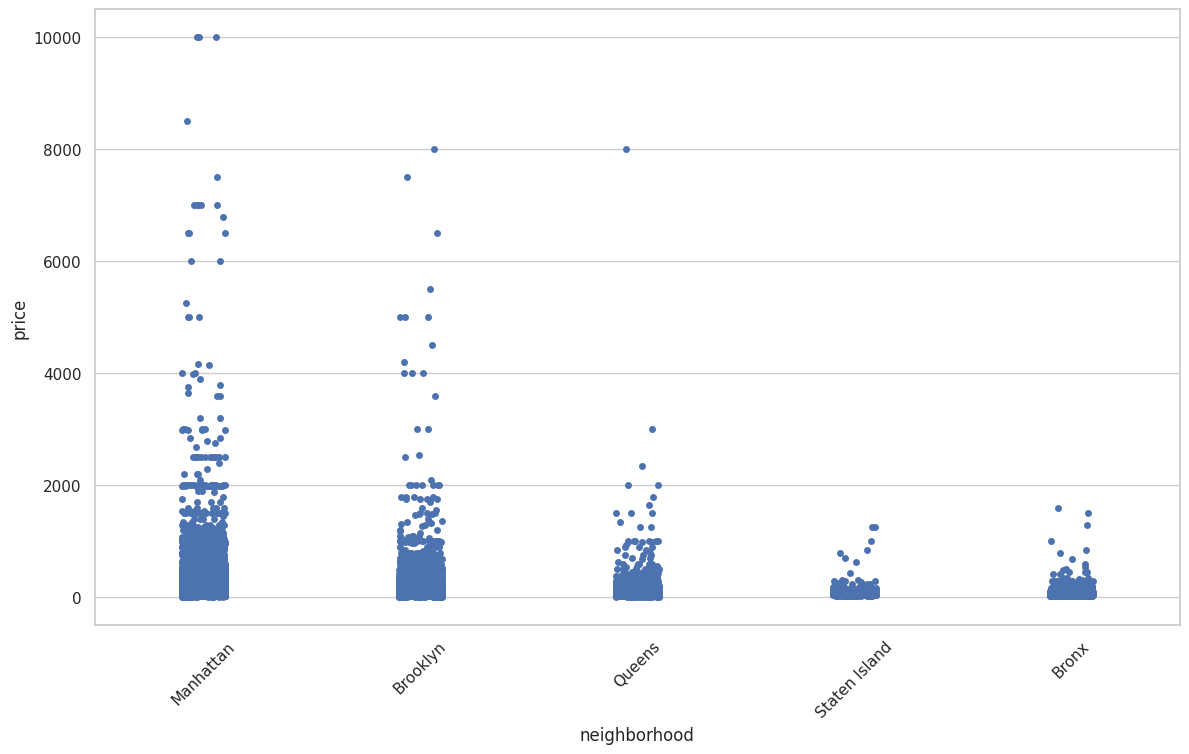

In [130]:
#Q13-3) # price가 10000인 이상치 제거
# 이유: 평균에서 22표준편차나 떨어진 값이 너무 많음, 수집 과정에서의 오류였을 가능성 높음
df.loc[df['price'] == 10000, 'price'] = None

plt.figure(figsize=(14, 8))
sns.stripplot(x='neighborhood', y='price', data=df)
plt.xlabel('neighborhood')
plt.ylabel('price')
plt.xticks(rotation=45)
plt.show()

---

EDA는 언뜻보면 불필요해 보이는 과정이지만, 실제 데이터를 다룰때 매우매우 중요한 과정입니다.

때문에 기본적인 개념 및 시각화 방법은 숙지해 두시는 것이 좋습니다!

또한 FE를 통하여 여러분들이 실제로 필요한 모델에 필요한 변수 형태를 띄게 변수를 바꿔주는 과정 또한 필수적인 과정이니, 다양한 방법의 FE 역시 숙지해 두시는 게 좋습니다

---

* Q2 hint

<font color='white'> df의 null의 개수를 센 다음에, ".to_frame()" 을 써보세요.
1. missingnum=df.isnull().sum()으로 우선 결측치확인
2. missingnum>0조건 만족시키는 missingnum 확인하기
3. missingnum을 column으로 하는 새로운 df생성
4. 새로운 df sort하기
5. missing_%를 새로운 column으로 추가

</font>

* Q3 hint


<font color='white'> x축 라벨을 45도 기울이려면 plot.set_xticklabels()을 찾아보세요. </font>
